<a href="https://colab.research.google.com/github/anavegaa/deep/blob/main/02_preprocesado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving archive.zip to archive.zip


In [ ]:
!unzip archive.zip -d tomato-leaf-dataset

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: tomato-leaf-dataset/tomato/train/Tomato___Target_Spot/002213fb-b620-4593-b9ac-6a6cc119b100___Com.G_TgS_FL 8360.JPG  
  inflating: tomato-leaf-dataset/tomato/train/Tomato___Target_Spot/0044d10f-7062-4655-8abd-9fffc5b2f152___Com.G_TgS_FL 7908.JPG  
  inflating: tomato-leaf-dataset/tomato/train/Tomato___Target_Spot/00854623-ba28-446d-a1d5-03c0ae3f99d9___Com.G_TgS_FL 7949.JPG  
  inflating: tomato-leaf-dataset/tomato/train/Tomato___Target_Spot/0118c27a-f34a-41e1-8b2f-d2c564f83c5c___Com.G_TgS_FL 0013.JPG  
  inflating: tomato-leaf-dataset/tomato/train/Tomato___Target_Spot/0118ed61-b135-45be-ad81-7e2d54203be4___Com.G_TgS_FL 8241.JPG  
  inflating: tomato-leaf-dataset/tomato/train/Tomato___Target_Spot/0197df47-a9cb-4b6c-b72c-ac0e9af6d135___Com.G_TgS_FL 0779.JPG  
  inflating: tomato-leaf-dataset/tomato/train/Tomato___Target_Spot/025510ac-15db-4861-b02b-21da82161100___Com.G_TgS_FL 0952.JPG  
  inflating: tomato-lea

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
train_dir = "/content/tomato-leaf-dataset/tomato/train"
val_dir = "/content/tomato-leaf-dataset/tomato/val"

# Parámetros
img_size = (128, 128)
batch_size = 32


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 10000 images belonging to 10 classes.


In [ ]:
val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 1000 images belonging to 10 classes.


In [ ]:
# Cargar una batch
x_batch, y_batch = next(train_generator)
print("Forma de las imágenes:", x_batch.shape)
print("Forma de las etiquetas:", y_batch.shape)


Forma de las imágenes: (32, 128, 128, 3)
Forma de las etiquetas: (32, 10)


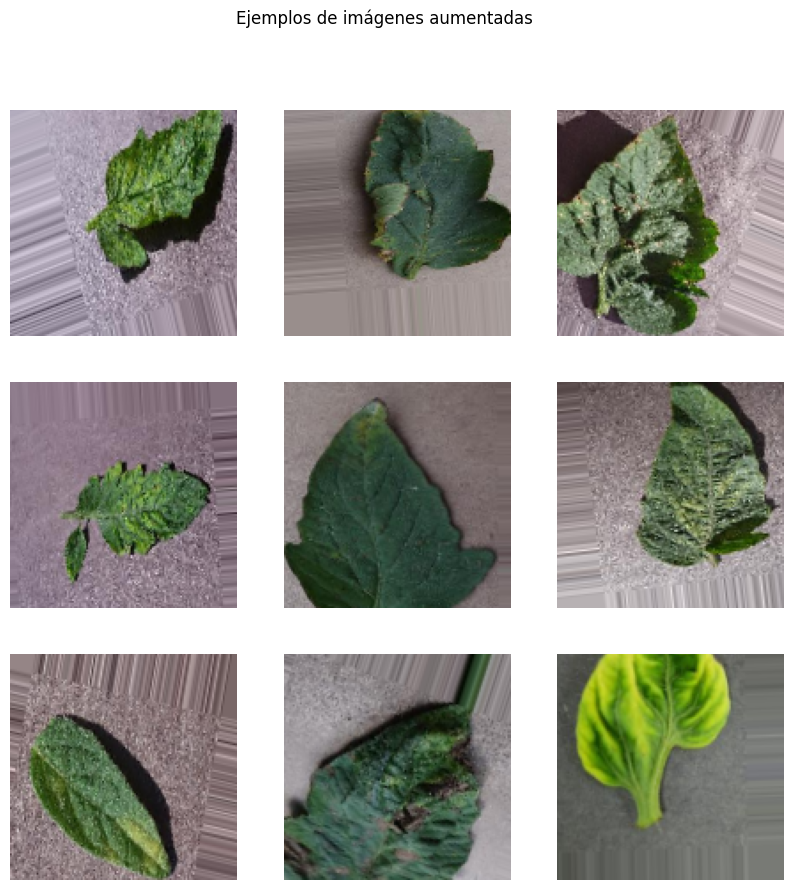

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_batch[i])
    plt.axis('off')
plt.suptitle("Ejemplos de imágenes aumentadas")
plt.show()
